In [195]:
### 빅데이터 프로젝트 ###

# 출산율 추이 예측

# 1) 혼인율
# 2) 취업율
# 3) 여성취업 장애요인 --> '육아'가 절대적으로 높음
# 4) 유배우여성의 향후출산계획(15,18년)
# 5) 모의 연령별 출산율 --> 출산연령이 점점 높아짐

# ==> 출산율(전체 출산율/연령별 출산율) 

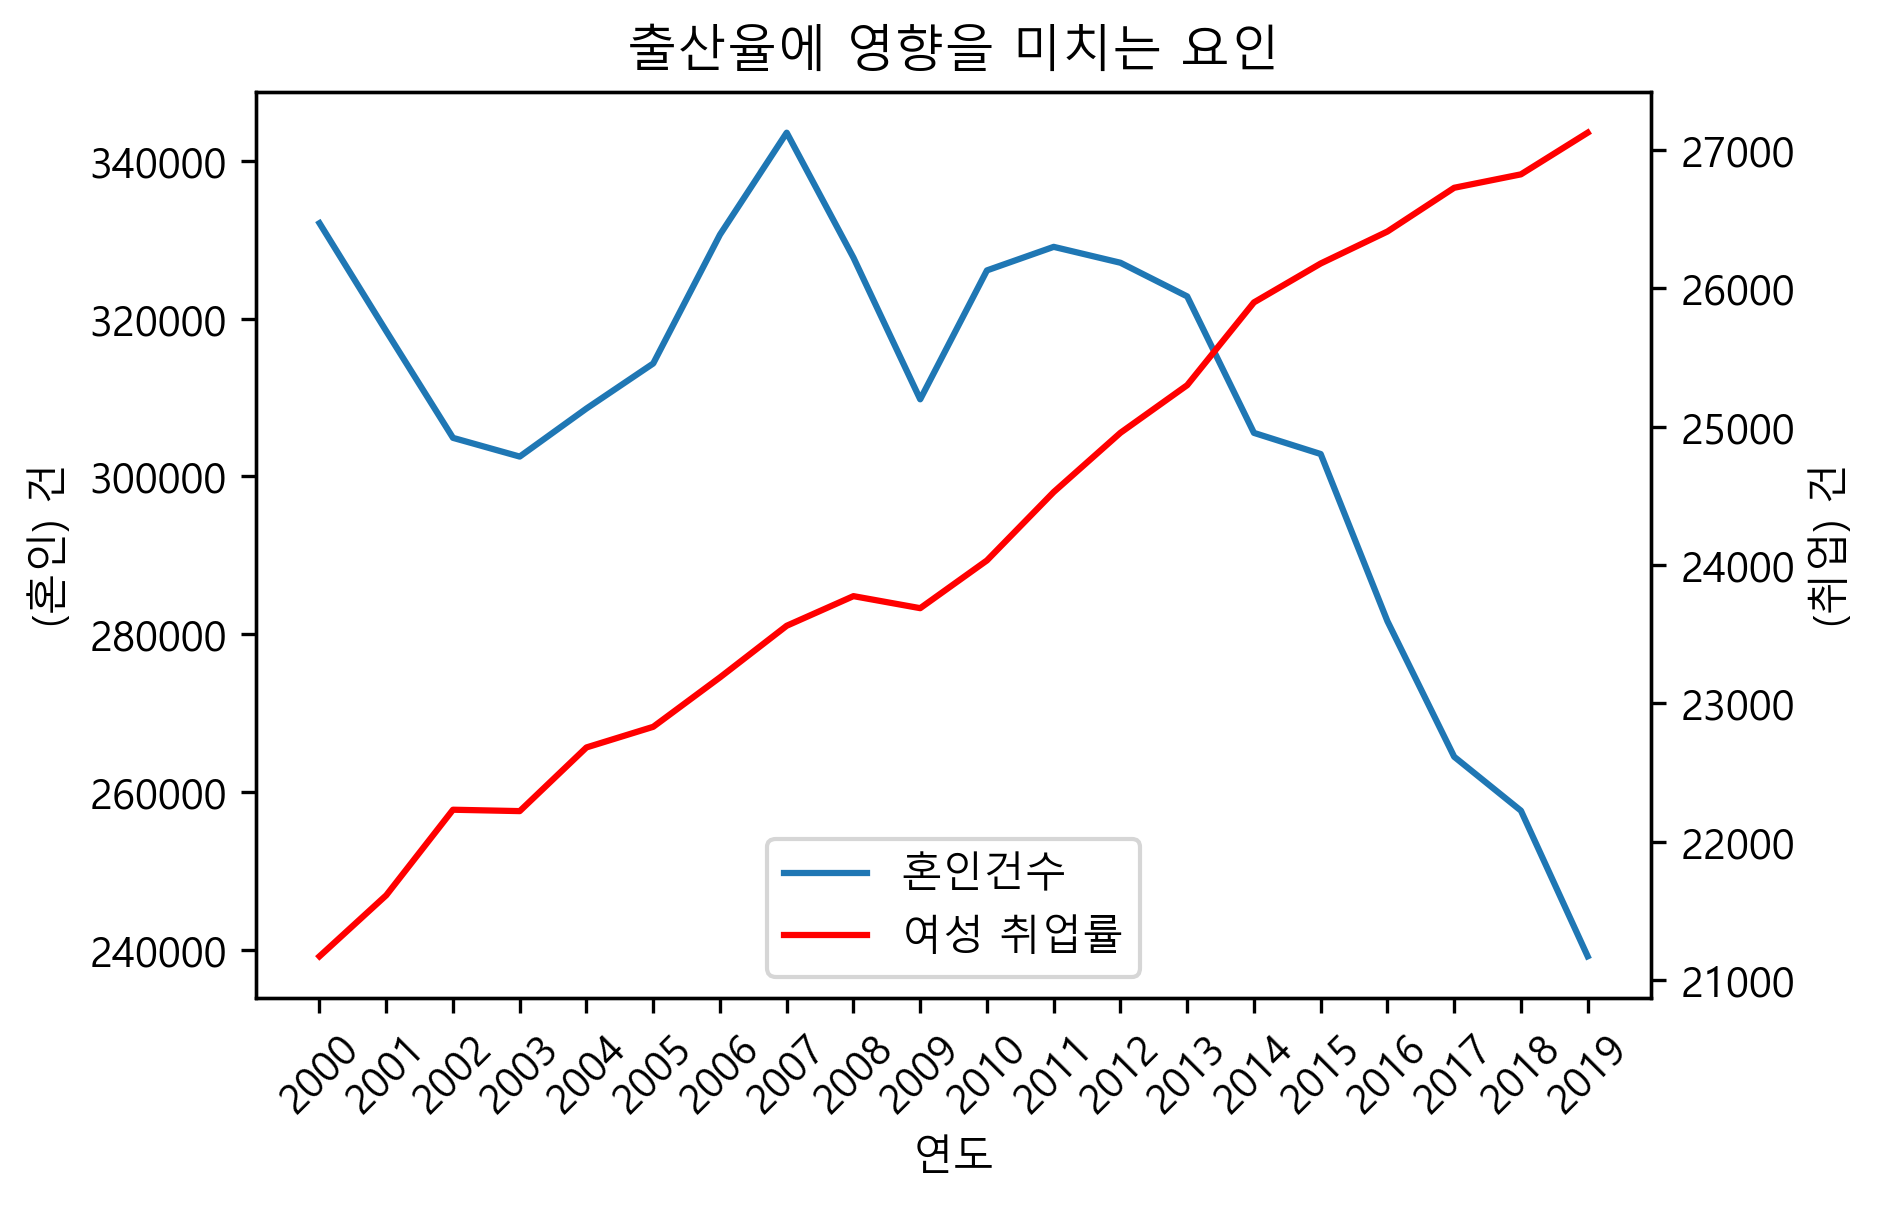

In [229]:
# 출산율에 영향을 미치는 요인(혼인율, 취업률) 분석

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')


# open & read file
data_marriage = pd.read_csv('marriage.csv', encoding='cp949', index_col=0)
data_employment = pd.read_csv('employment.csv', encoding = 'cp949') # 성별 취업률 (2000-2019)


# 전국 혼인건수만 추출
data_marriage = data_marriage.iloc[0].astype(int)

# 혼인건수 index, data 리스트로 변환
index_marriage = list(data_marriage.index)
data_marriage = list(data_marriage)


# read row data
emp = [] # 전체 취업 건수 저장(여성)
list_emp = [] 

for row in data_employment.index:
    # 전체 데이터만 list_emp에 저장
    if(row == 0):
        list_emp = data_employment.loc[row]
 
# 데이터만 저장
list_emp = list_emp[2:]

for index in range(0,len(list_emp)):
    index = int(index)
    emp.append(int(list_emp[index]))
    
        
# graph
fig, ax0 = plt.subplots(dpi = 300)
ax1 = ax0.twinx()

ax0.set_title('출산율에 영향을 미치는 요인')
ax0.set_xticklabels(index_marriage, rotation=45)
ax0.set_xlabel("연도")

ax0.plot(index_marriage,data_marriage, label='혼인건수')
ax0.plot(0,240000,'r-', label='여성 취업률')
ax0.set_ylabel("(혼인) 건")

ax1.plot(list_emp.index, emp,'r-', label='여성 취업률')
ax1.set_ylabel("(취업) 건")


ax0.legend(loc='lower center')
#plt.savefig('출산율에 영향을 미치는 요인(혼인율, 취업률).png', bbox_inches='tight', pad_inches=1)
plt.show()


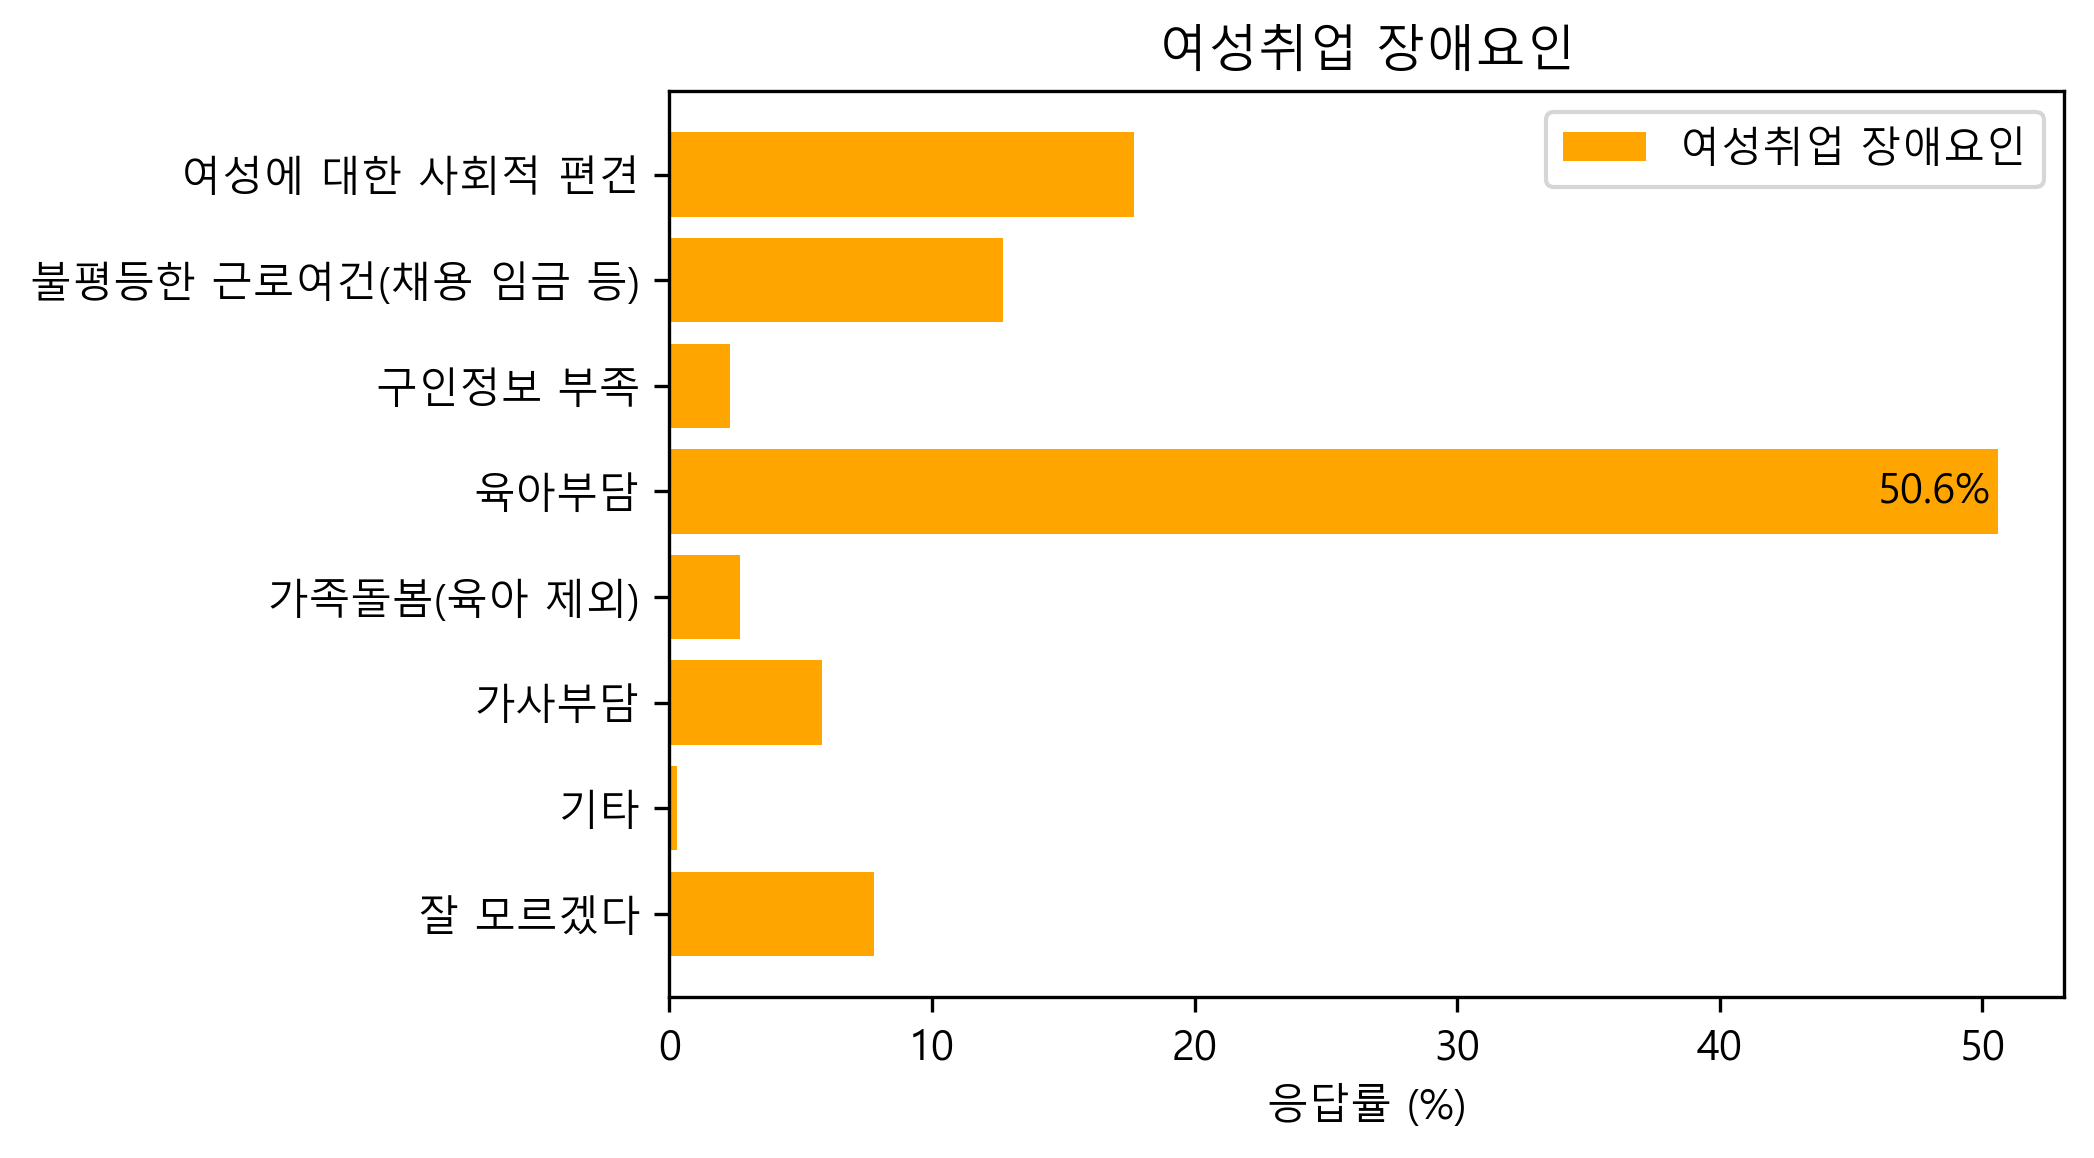

In [197]:
# 여성취업 장애요인 분석

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_barriers = pd.read_csv('employment_barriers.csv', encoding='cp949')
data_barriers = data_barriers.iloc[0:2,59:]
data_barriers = data_barriers.drop(data_barriers.columns[[1, 3]], axis=1)

index_barriers = list(data_barriers.iloc[0])
index_barriers.reverse()
data_barriers = list(data_barriers.iloc[1].astype(float))
data_barriers.reverse()

plt.figure(dpi=300)
plt.title('여성취업 장애요인')
plt.barh(index_barriers, data_barriers, label='여성취업 장애요인', color='orange')
plt.xlabel('응답률 (%)')


plt.annotate(str(data_barriers[4])+'%', (46,3.9))

plt.legend()
#plt.savefig('여성취업 장애요인.png', bbox_inches='tight', pad_inches=1)
plt.show()

특성별(1)        기혼여성 전체
특성별(2)             소계
응답자수 (명)        10630
낳을 생각임           10.4
낳지 않을 생각임        84.8
생각 중(모르겠음)        4.8
Name: 0, dtype: object
Index(['낳을 생각임', '낳지 않을 생각임', '생각 중(모르겠음)'], dtype='object')


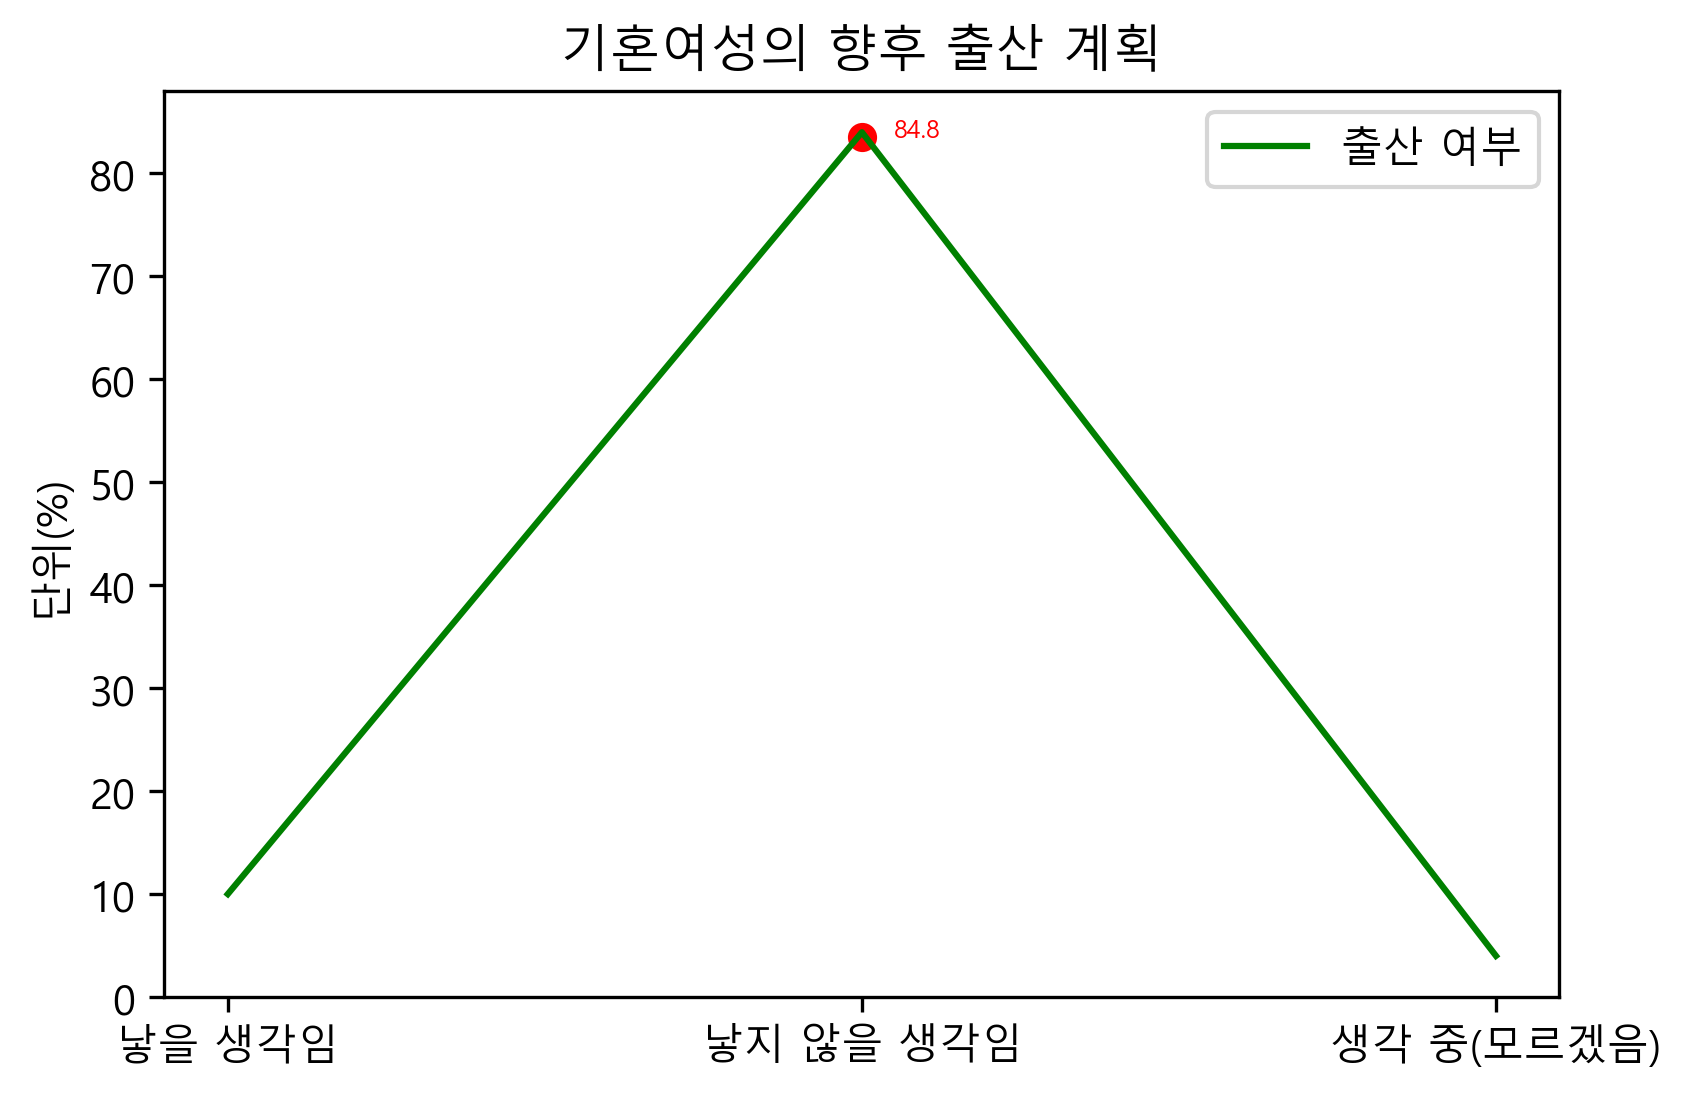

In [202]:
# 기혼 여성의 향후 출산계획


# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# open & read file
data_childbirth_plan = pd.read_csv('childbirth_plan.csv', encoding = 'cp949') # 성별 취업률 (2000-2019)

# read row data
childbirth_plan = []
list_childbirth_plan = []

for row in data_childbirth_plan.index:
    
    list_childbirth_plan = data_childbirth_plan.loc[row]
 
print(list_childbirth_plan)

# 데이터만 저장
list_childbirth_plan  = list_childbirth_plan [3:]
print(list_childbirth_plan.index)

for index in range(0,len(list_childbirth_plan)):
    index = int(index)
    childbirth_plan.append(int(list_childbirth_plan[index]))
        
        
# graph
plt.figure(dpi = 300)
plt.title('기혼여성의 향후 출산 계획')
plt.scatter(1, 83.5, c='r')
plt.plot(list_childbirth_plan.index, childbirth_plan, 'g-',label = '출산 여부')
plt.ylabel('단위(%)')
plt.text(1.05, 83.5, "84.8", c='r',fontsize=6)
plt.xticks(rotation=0)
plt.legend()
plt.show()

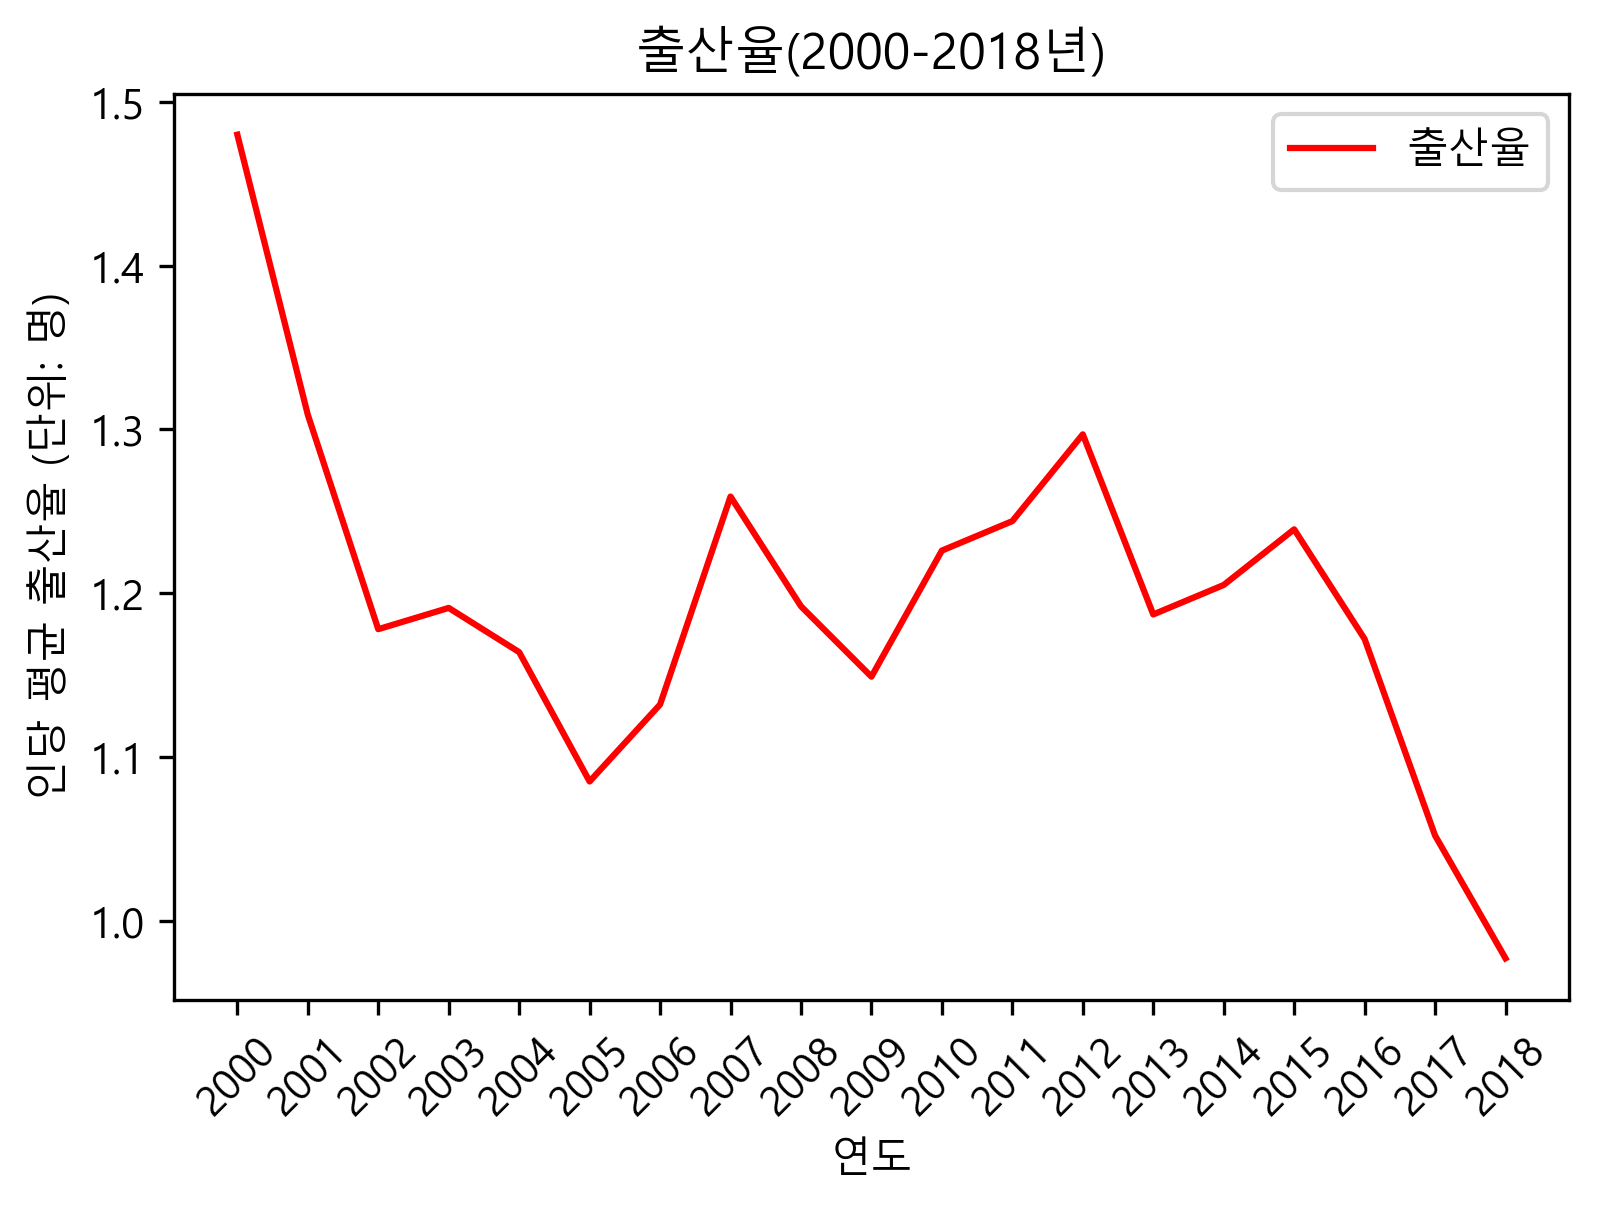

In [227]:
# 출산율 데이터

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_fertility_rate = pd.read_csv('fertility_rate.csv', encoding='cp949')

data_fertility_rate = data_fertility_rate.iloc[0]
del data_fertility_rate['시군구별']

index_fertility_rate = data_fertility_rate.index
data_fertility_rate = data_fertility_rate.astype(float)

plt.figure(dpi=300)
plt.title('출산율(2000-2018년)')
plt.plot(index_fertility_rate, data_fertility_rate, label='출산율', color='red')
plt.xlabel('연도')
plt.ylabel('인당 평균 출산율 (단위: 명)')
plt.xticks(rotation=45)


plt.legend()
#plt.savefig('출산율.png', bbox_inches='tight', pad_inches=1)
plt.show()

20-24세(2000)     39.2
25-29세(2000)    150.3
30-34세(2000)     84.1
35-39세(2000)     17.6
Name: 0, dtype: object
20-24세(2018)     8.2
25-29세(2018)      41
30-34세(2018)    91.4
35-39세(2018)    46.1
Name: 0, dtype: object
4


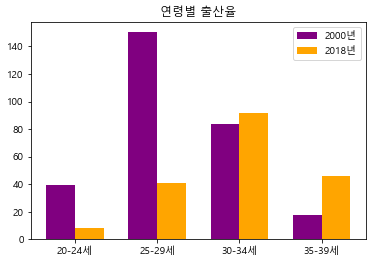

In [236]:
# 모의 연령별 출산율

# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

# open & read file
data_fertility = pd.read_csv('모의 연령별 출산율.csv', encoding = 'cp949') # 성별 취업률 (2000-2019)

# read row data
fertility_rate = []
list_fertility_rate = []

for row in data_fertility.index:
    
     list_fertility_rate = data_fertility.loc[row]
 

# 데이터만 저장
list_fertility_rate  = list_fertility_rate [2:]
list_fertility_rate_2000 = list_fertility_rate[:4]
list_fertility_rate_2018 = list_fertility_rate[5:]

print(list_fertility_rate_2000)
print(list_fertility_rate_2018)


index = ['20-24세','25-29세','30-34세','35-39세']
#index = [1,2,3,4]
print(len(index))




# graph
x = np.arange(len(index))  # the label locations
width = 0.35                # the width of the bars
fig, ax = plt.subplots()
plt.title('연령별 출산율')
rects1 = ax.bar(x - width/2, list_fertility_rate_2000, width, label='2000년', color = 'purple')
rects2 = ax.bar(x + width/2, list_fertility_rate_2018, width, label='2018년', color = 'orange')
ax.set_xticklabels(index)
ax.set_xticks(x)



#plt.figure(dpi = 300)
#plt.title('연령별 출산율')
#plt.bar(index, list_fertility_rate_2000)
#plt.bar(index, list_fertility_rate_2018, label = '2018년 출산율')
#plt.xticks(rotation=0)
ax.legend()
plt.show()



In [516]:
# 혼인율과 취업률로 출산율 예측 - Naive Bayes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


# 데이터 불러오기
data_marriage = pd.read_csv('marriage.csv', encoding='cp949', index_col=0)
data_employment = pd.read_csv('employment.csv', encoding = 'cp949')
data_fertility_rate = pd.read_csv('fertility_rate.csv', encoding='cp949')


# 데이터 가공
data_marriage = data_marriage.iloc[0].astype(int)

emp = [] # 전체 취업 건수 저장(여성)
list_emp = [] 
for row in data_employment.index:
    # 전체 데이터만 list_emp에 저장
    if(row == 0):
        list_emp = data_employment.loc[row]
list_emp = list_emp[2:]

    
data_fertility_rate = data_fertility_rate.iloc[0]
del data_fertility_rate['시군구별']
data_fertility_rate['2019'] = 0.925 # 2019년 데이터 추가


        
# train 데이터와 test 데이터 분리
tmp = []
for i in range(0,20):
    tmp.append([int(data_marriage[i]), int(list_emp[i])])
X = np.array(tmp)
y = np.array(data_fertility_rate.astype(float)) 
y = y.reshape(20,1)


# 1.0 이하: 1, 1.0~1.1: 2, 1.1~1.2:3, 1.2 이상: 4
for i in range(0,len(y)):
    if(y[i][0] < 1.0):
        y[i][0] = 1
    elif(y[i][0] >= 1.0 and y[i][0] < 1.1):
        y[i][0] = 2
    elif(y[i][0] >= 1.1 and y[i][0] < 1.2):
        y[i][0] = 3
    else:
        y[i][0] = 4


X_train, X_test, y_train, y_test = train_test_split(X, y)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)


# 학습, 예측
gnb_clf = GaussianNB() # Gaussian Naive Bayes 
gnb_clf = gnb_clf.fit(X_train, y_train)
gnb_prediction = gnb_clf.predict(X_test)
print(gnb_prediction)


# 샘플데이터 예측
sample1=[[200000, 28000]] # 혼인율이 20만, 취업률이 28,000일 때, 출산율은?
sample1_result= gnb_clf.predict(sample1)
print('혼인건수가 20만 건, 취업건수가 28,000 건일 때, 출산율은?', sample1_result)

sample2=[[350000, 20000]] # 혼인율이 35만, 취업률이 2만일 때, 출산율은?
sample2_result= gnb_clf.predict(sample2)
print('혼인건수가 35만 건, 취업건수가 2만 건일 때, 출산율은?', sample2_result)


# 성능검사
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print('Confusion Matrix')
print(confusion_matrix(y_test, gnb_prediction))

print('Classification Report')
print(classification_report(y_test, gnb_prediction))



[4. 3. 3. 4. 4.]
혼인건수가 20만 건, 취업건수가 28,000 건일 때, 출산율은? [2.]
혼인건수가 35만 건, 취업건수가 2만 건일 때, 출산율은? [4.]
Confusion Matrix
[[1 1]
 [1 2]]
Classification Report
              precision    recall  f1-score   support

         3.0       0.50      0.50      0.50         2
         4.0       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



C:\Users\user\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
